In [3]:
# import libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split , cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,LassoCV,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.describe(include = object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.groupby('longitude').median_house_value.count().sort_values()

longitude
-124.35      1
-123.64      1
-123.63      1
-123.59      1
-123.58      1
          ... 
-118.32    142
-118.27    144
-118.29    148
-118.30    160
-118.31    162
Name: median_house_value, Length: 844, dtype: int64

In [9]:
df.groupby('median_house_value').longitude.nunique().sort_values()

median_house_value
495900.0      1
495800.0      1
495400.0      1
494700.0      1
490400.0      1
           ... 
187500.0     74
162500.0     87
112500.0     88
137500.0     93
500001.0    233
Name: longitude, Length: 3842, dtype: int64

In [10]:
df[df.median_house_value>450000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
140,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,489600.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


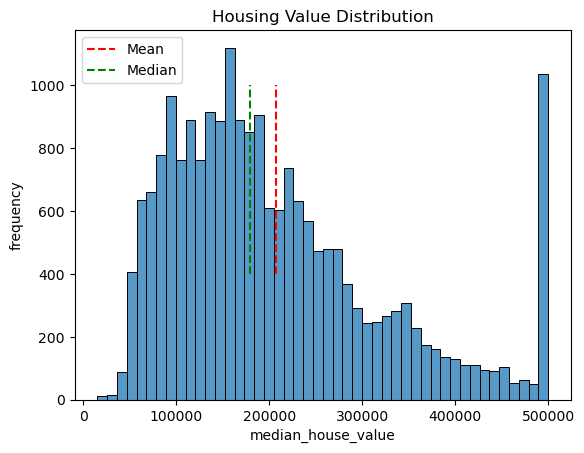

In [11]:
ax = sns.histplot(data = df, x = 'median_house_value')
ax.set( xlabel = 'median_house_value' , 
        ylabel='frequency',
        title= 'Housing Value Distribution')
plt.vlines(x = df['median_house_value'].mean() , ymin = 400, ymax = 1000, color = 'red', linestyle = "--" )
plt.vlines(x = df['median_house_value'].median(), ymin = 400, ymax = 1000, color = 'green', linestyle = "--")
plt.legend(['Mean','Median'])
plt.show()
# The distrbution is right skewed.


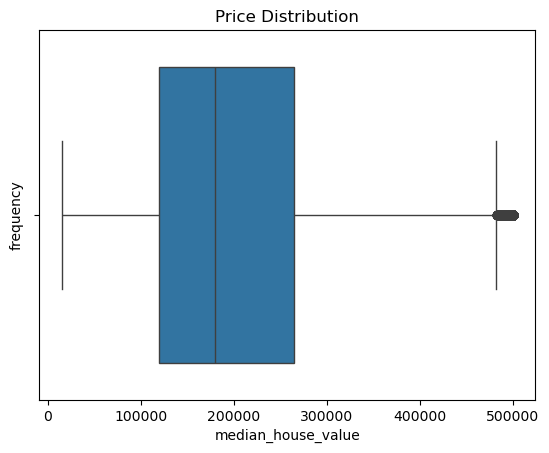

In [12]:
ax = sns.boxplot(data = df ,  x = 'median_house_value')
ax.set(
    xlabel = 'median_house_value',
    ylabel = 'frequency',
    title  ='Price Distribution'  
)
plt.show()

In [13]:
min_price = df['median_house_value'].min()
max_price = df['median_house_value'].max()
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print('min_value:',min_price)
print('max_value:',max_price)
print('IQR:',IQR)
print('Q1:',Q1)
print('Q3:',Q3)

min_value: 14999.0
max_value: 500001.0
IQR: 145125.0
Q1: 119600.0
Q3: 264725.0


In [14]:
df[df['median_house_value']>upper_bound]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
140,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,489600.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


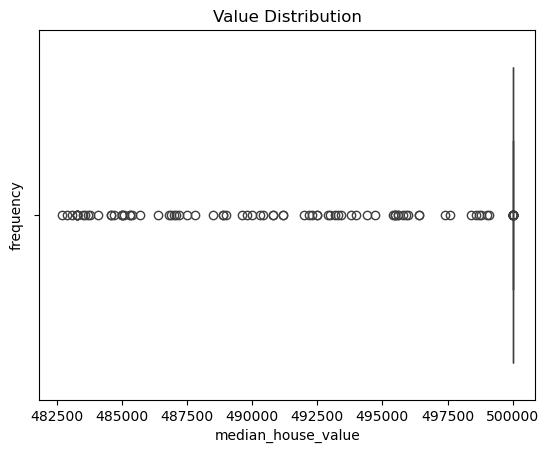

In [15]:
ax = sns.boxplot(data = df[df['median_house_value']>upper_bound],  x = 'median_house_value')
ax.set(
    xlabel = 'median_house_value',
    ylabel = 'frequency',
    title  ='Value Distribution'  
)
plt.show()

In [16]:
df.corr(numeric_only = True)['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

<Axes: >

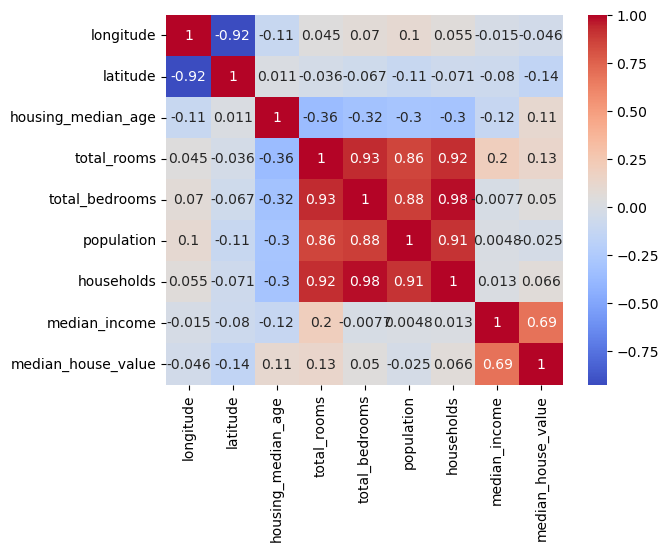

In [17]:
sns.heatmap(df.corr(numeric_only = True), annot  = True ,cmap = 'coolwarm' )
# Biggest corr is meadian_income.
# There are multicolinearity like corr ( total_bedrooms ,households) is 0.98 ,corr(total_rooms,total_bedrooms )is 0.93.   

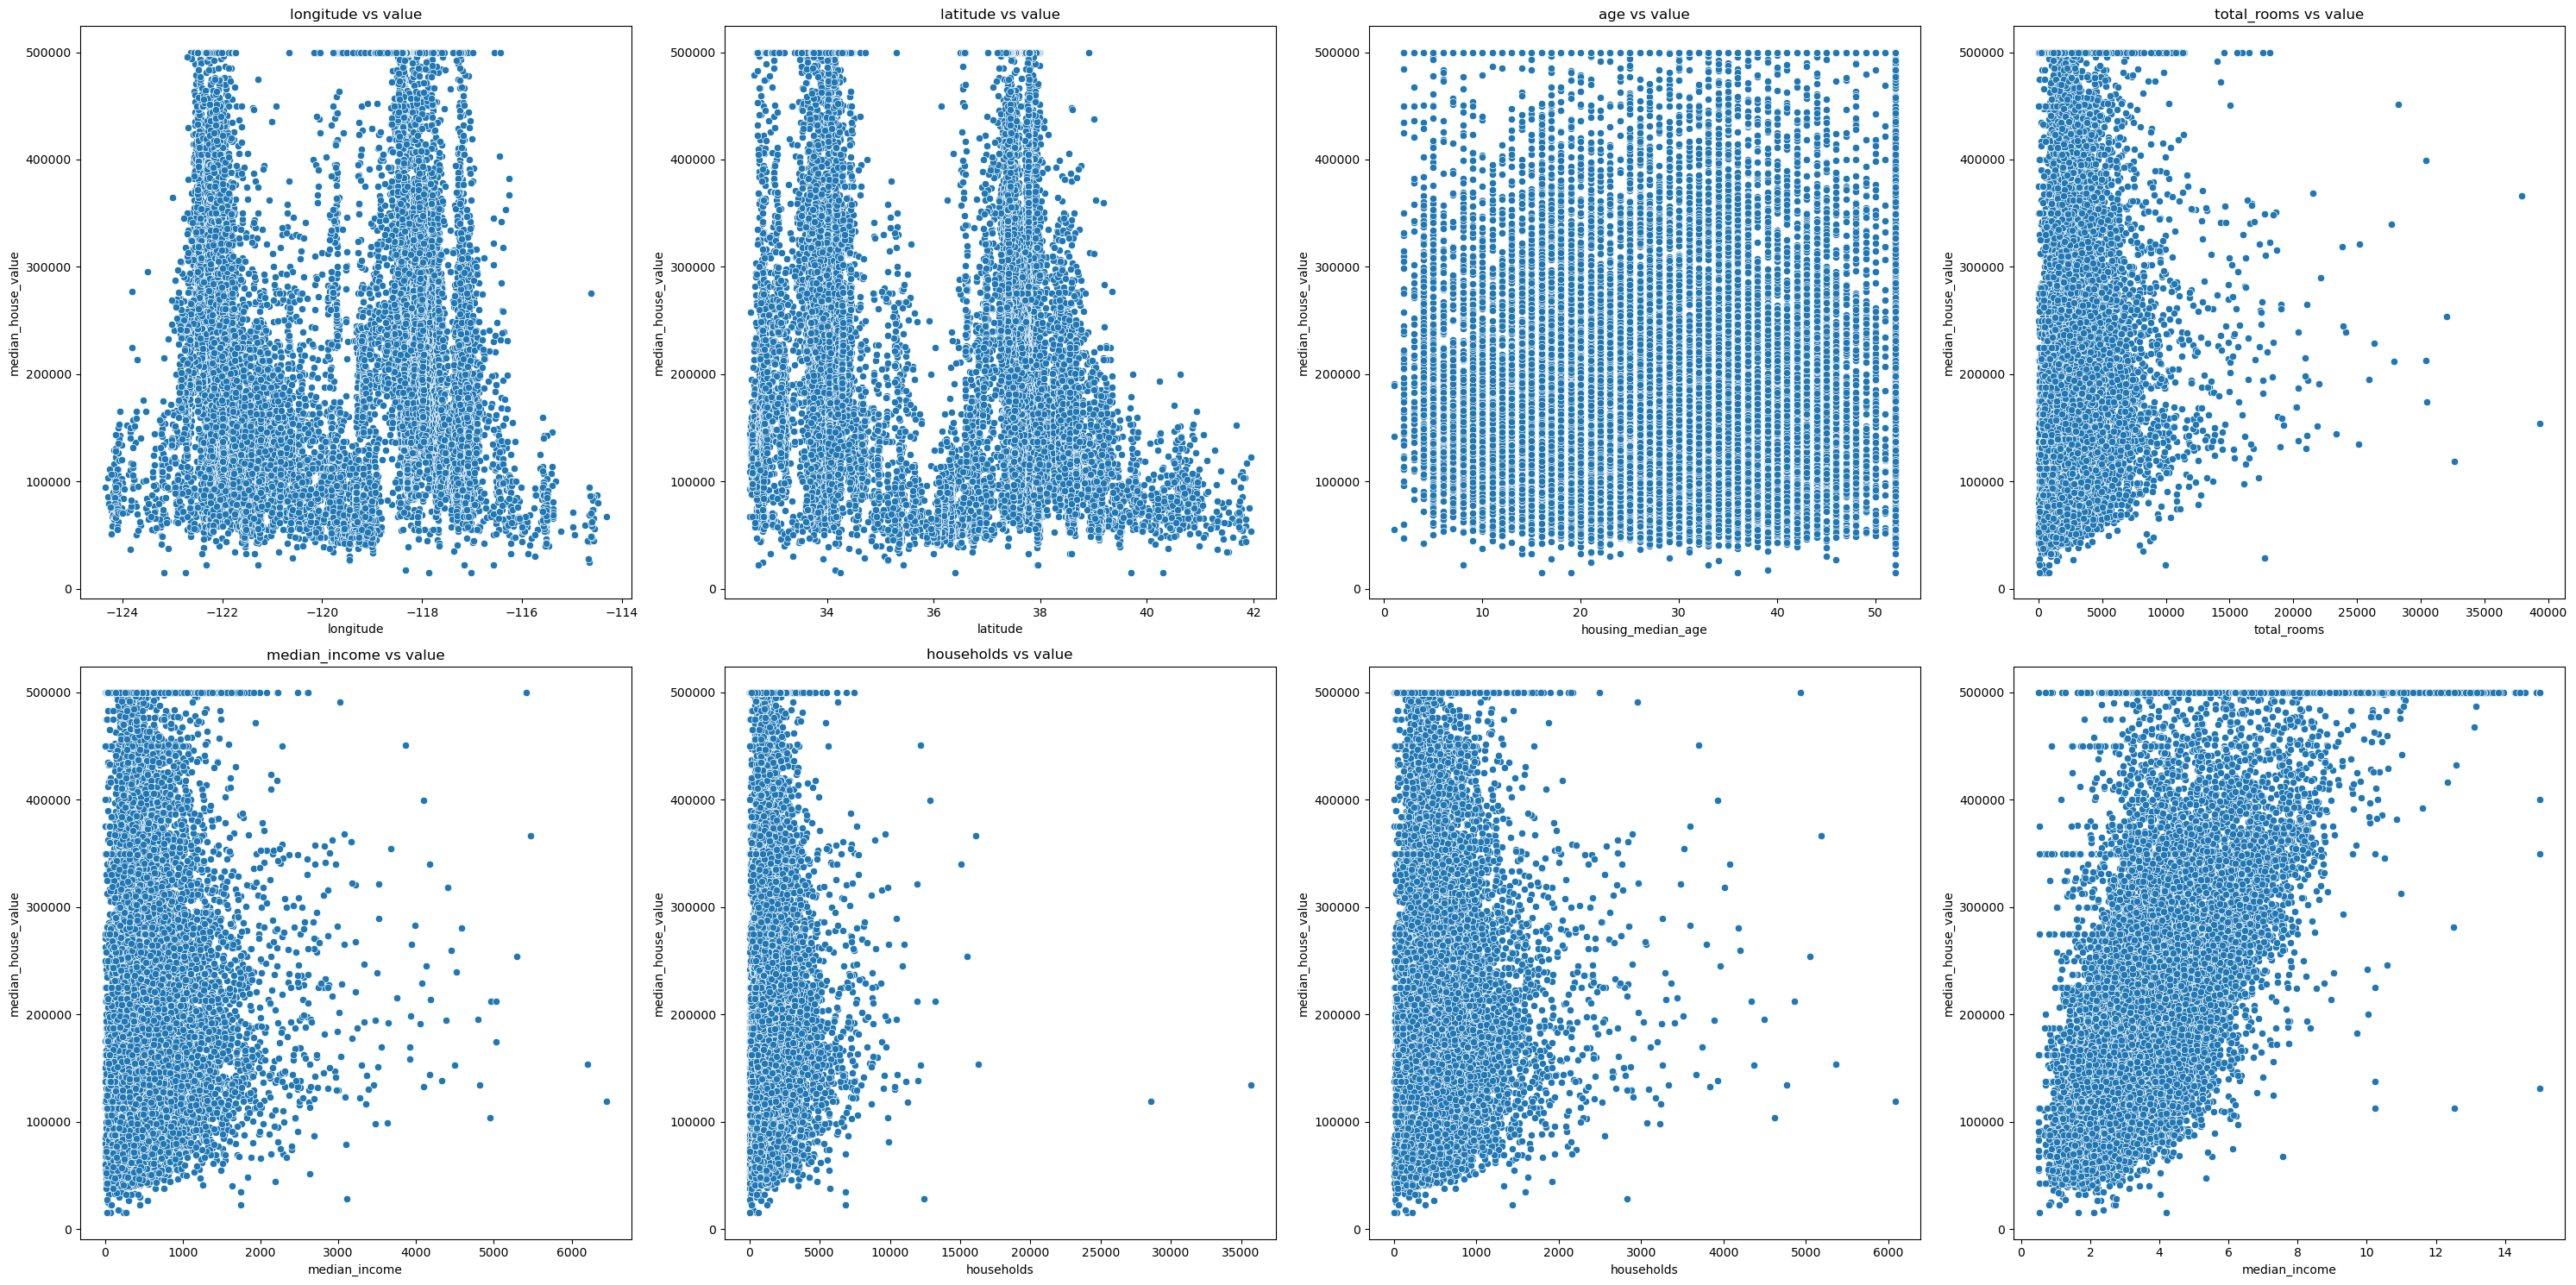

In [18]:
fig,ax = plt.subplots(2,4,figsize = (30,15))
sns.scatterplot(data = df ,  x = 'longitude' ,y = 'median_house_value',ax = ax[0,0])
ax[0,0].set(
    xlabel = 'longitude',
    ylabel = 'median_house_value',
    title = 'longitude vs value'
)

sns.scatterplot(data = df ,  x = 'latitude' ,y = 'median_house_value',ax = ax[0,1])
ax[0,1].set(
    xlabel = 'latitude',
    ylabel = 'median_house_value',
    title = 'latitude vs value'
)

sns.scatterplot(data = df ,  x = 'housing_median_age' ,y = 'median_house_value',ax = ax[0,2])
ax[0,2].set(
    xlabel = 'housing_median_age',
    ylabel = 'median_house_value',
    title = 'age vs value'
)

sns.scatterplot(data = df ,  x = 'total_rooms' ,y = 'median_house_value',ax = ax[0,3])
ax[0,3].set(
    xlabel = 'total_rooms',
    ylabel = 'median_house_value',
    title = 'total_rooms vs value'
)

sns.scatterplot(data = df ,  x = 'total_bedrooms' ,y = 'median_house_value',ax = ax[1,0])
ax[1,0].set(
    xlabel = 'total_bedrooms',
    ylabel = 'median_house_value',
    title = 'total_bedrooms vs value'
)
sns.scatterplot(data = df ,  x = 'population' ,y = 'median_house_value',ax = ax[1,1])
ax[1,0].set(
    xlabel = 'population',
    ylabel = 'median_house_value',
    title = 'population vs value'
)

sns.scatterplot(data = df ,  x = 'households' ,y = 'median_house_value',ax = ax[1,2])
ax[1,1].set(
    xlabel = 'households',
    ylabel = 'median_house_value',
    title = 'households vs value'
)

sns.scatterplot(data = df ,  x = 'median_income' ,y = 'median_house_value',ax = ax[1,3])
ax[1,0].set(
    xlabel = 'median_income',
    ylabel = 'median_house_value',
    title = 'median_income vs value'
)

plt.tight_layout()
plt.show()

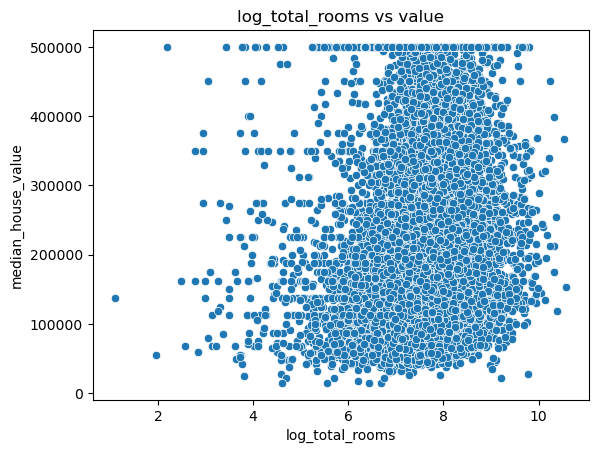

In [19]:
#Explore total_rooms vs values

ax = sns.scatterplot(data = df ,   x=np.log1p(df['total_rooms']) ,y = 'median_house_value')
ax.set_xlabel('log_total_rooms'),
ax.set_ylabel('median_house_value'),
ax.set_title('log_total_rooms vs value')
plt.show()

<Axes: xlabel='room_bins', ylabel='median_house_value'>

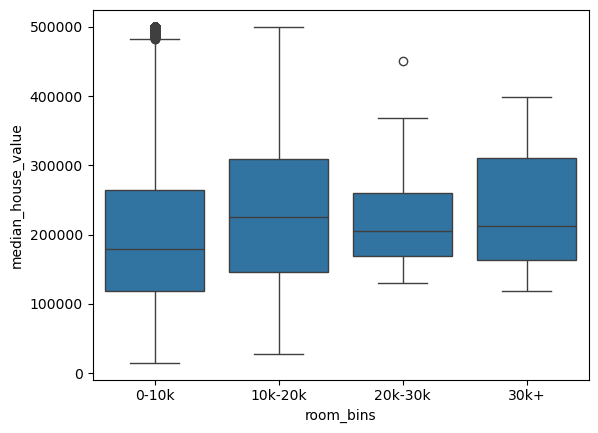

In [20]:
bins = (0,10000,20000,30000, df['total_rooms'].max())
labels = ('0-10k','10k-20k','20k-30k','30k+')
df['room_bins'] = pd.cut(df['total_rooms'],bins = bins, labels = labels )

sns.boxplot(data = df , x = 'room_bins',y = 'median_house_value')

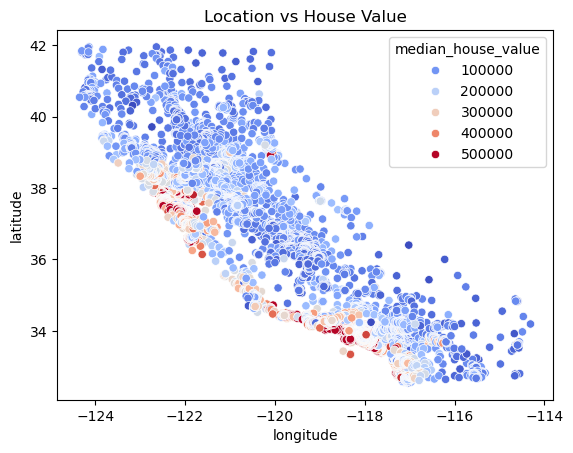

In [21]:
# Explore the location vs value

ax = sns.scatterplot(data = df , x = 'longitude',y = 'latitude',hue = 'median_house_value',palette='coolwarm')

ax.set_title('Location vs House Value')
plt.show()
# Higher house values appear in some concentrated clusters.

<Axes: xlabel='age_bins', ylabel='median_house_value'>

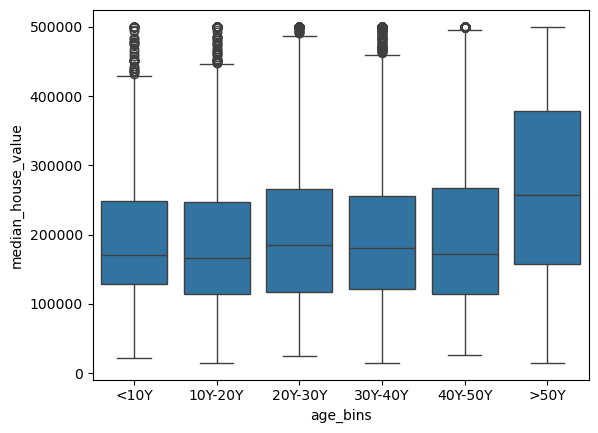

In [22]:
#Exlplore housing_median_age vs value
bins = (0,10,20,30,40,50,df['housing_median_age'].max())
labels = ('<10Y','10Y-20Y','20Y-30Y','30Y-40Y','40Y-50Y','>50Y')
df['age_bins'] = pd.cut(df['housing_median_age'],bins= bins,labels = labels)
sns.boxplot(data = df , x = 'age_bins',y ='median_house_value' )

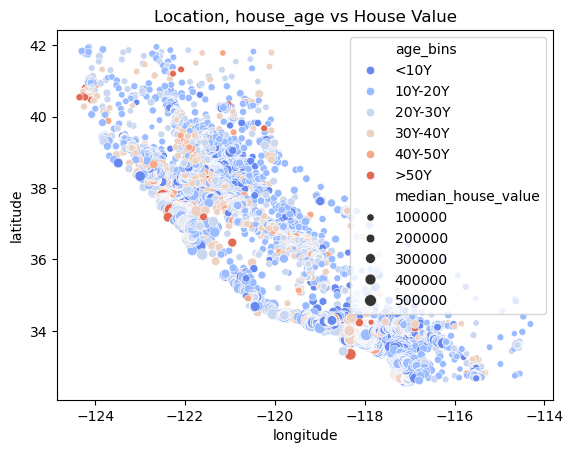

In [23]:
ax = sns.scatterplot(data = df , x = 'longitude',y = 'latitude',size ='median_house_value',hue = 'age_bins' ,palette='coolwarm')

ax.set_title('Location, house_age vs House Value')
plt.show()

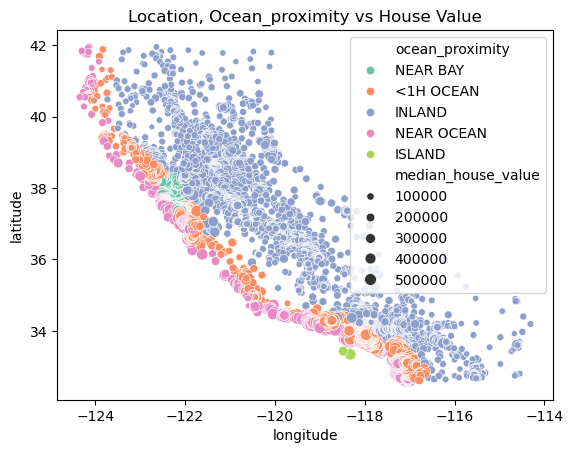

In [24]:
ax = sns.scatterplot(data = df ,x = 'longitude',y = 'latitude',size ='median_house_value', hue = 'ocean_proximity' ,palette='Set2')

ax.set_title('Location, Ocean_proximity vs House Value')
plt.show()

<Axes: xlabel='income_bins', ylabel='median_house_value'>

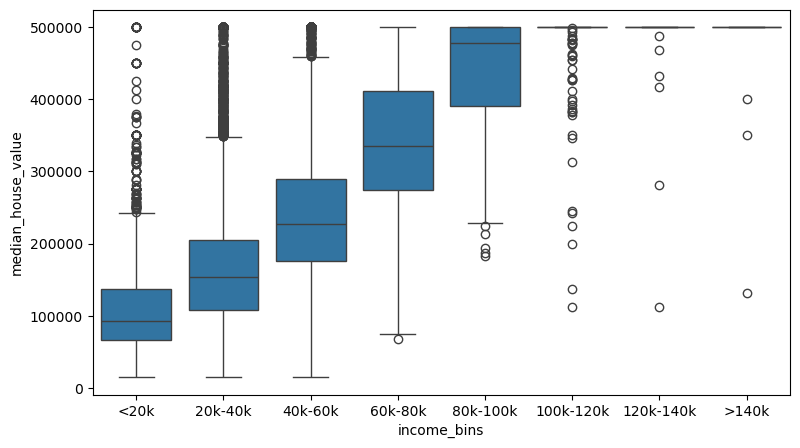

In [25]:
#Explore median_income vs value
bins = (0,2,4,6,8,10,12,14,df['median_income'].max())
labels = ('<20k','20k-40k','40k-60k','60k-80k','80k-100k','100k-120k','120k-140k','>140k')
df['income_bins'] = pd.cut(df['median_income'],bins = bins,labels = labels)
plt.figure(figsize=(9,5))
sns.boxplot(data = df , x = 'income_bins',y = 'median_house_value')
# There is positive corr between income and value

In [26]:
# dedermine features and target
X = df.drop('median_house_value',axis = 1)
y = df['median_house_value']
num_col = [col for col in X.columns if X[col].dtype not in ('category','object' )]
cat_col = [col for col in X.columns if X[col].dtype == 'object']

In [27]:
print(X[num_col].dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object


In [28]:
print(X[cat_col].dtypes)
print(X['ocean_proximity'].unique())

ocean_proximity    object
dtype: object
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [29]:
print(X[num_col].isna().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64


In [30]:
X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].mean())
print(X['total_bedrooms'].isna().sum())

0


In [31]:
print(X.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'room_bins', 'age_bins', 'income_bins'],
      dtype='object')


In [32]:
encoder = OneHotEncoder(sparse_output= False, handle_unknown='ignore')
ocean_encoder = encoder.fit_transform(X[['ocean_proximity']])
ocean_col = encoder.get_feature_names_out(['ocean_proximity'])
ocean_df = pd.DataFrame(ocean_encoder,columns = ocean_col, index = X.index)
X_final = pd.concat([X.drop('ocean_proximity', axis=1), ocean_df], axis=1)
print(X_final.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income room_bins age_bins income_bins  \
0       322.0       126.0         8.3252     0-10k  40Y-50Y    80k-100k   
1      2401.0      1138.0         8.3014     0-10k  20Y-30Y    80k-100k   
2       496.0       177.0         7.2574     0-10k     >50Y     60k-80k   
3       558.0       219.0         5.6431     0-10k     >50Y     40k-60k   
4       565.0       259.0         3.8462     0-10k     >50Y     20k-40k   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                 

In [33]:
final_num_col = [col for col in X_final.columns if X_final[col].dtype !='category']
print(final_num_col)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [34]:
#feature selection
selector  = sm.OLS(y,X_final[final_num_col])
selector = selector.fit()
selector.summary()
# All features : p < 0.05
# There are relationships

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3130.
Date:                Tue, 03 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:35:03   Log-Likelihood:            -2.5917e+05
No. Observations:               20640   AIC:                         5.184e+05
Df Residuals:                   20627   BIC:                         5.185e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
longitude                  -2.646e+04   1014.035    -26.092      0.000   -2.84e+04   -2.45e+04
latitude                    -2.52e+04    999.908    -25.200      0.000   -2.72e+04   -2.32e+04
housing_median_age          1057.8638     43.704     24.205      0.000     972.200    1143.528
total_rooms                   -4.7725      0.772     -6.186      0.000      -6.285      -3.260
total_bedrooms                72.2896      5.984     12.080      0.000      60.560      84.019
population                   -39.2618      1.064    -36.896      0.000     -41.348     -37.176
households                    76.9409      6.696     11.490      0.000      63.816      90.066
median_income               3.877e+04    332.447    116.635      0.000    3.81e+04    3.94e+04
ocean_proximity_<1H OCEAN  -2.236e+06   8.75e+04    -25.552      0.000   -2.41e+06   -2.06e+06
ocean_proximity_INLAND     -2.275e+06   8.65e+04    -26.312      0.000   -2.44e+06   -2.11e+06
ocean_proximity_ISLAND      -2.08e+06   9.34e+04    -22.257      0.000   -2.26e+06    -1.9e+06
ocean_proximity_NEAR BAY   -2.239e+06   8.79e+04    -25.467      0.000   -2.41e+06   -2.07e+06
ocean_proximity_NEAR OCEAN -2.231e+06   8.78e+04    -25.396      0.000    -2.4e+06   -2.06e+06
==============================================================================
Omnibus:                     5175.381   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19749.153
Skew:                           1.212   Prob(JB):                         0.00
Kurtosis:                       7.133   Cond. No.                     1.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size = 0.2,random_state = 42)

In [36]:
y = np.log1p(y)

In [37]:
#Normalize of data
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[final_num_col])
X_test_num_scaled = scaler.transform(X_test[final_num_col])

In [38]:
#train the model with LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train_num_scaled,y_train)

score = cross_val_score(LR_model,
                        X_train_num_scaled,
                        y_train,
                        cv =5 ,
                        scoring = 'neg_mean_squared_error'
                       )
mse_score = -score
rmse_score = np.sqrt(mse_score)
print('mse_score;',mse_score)
print('rmse_score:',rmse_score)
print('avg_mse_score:',np.mean(mse_score))
print('avg_rmse_score:',np.mean(rmse_score))
print('-----------------------------------------------------------------')

r2_scores = cross_val_score(LR_model,
                        X_train_num_scaled,
                        y_train,
                        cv =5 ,
                        scoring = 'r2'                      
                       )
print('r2_scores:',r2_scores)
print('avg_r2_score:',np.mean(r2_scores))


mse_score; [4.72266638e+09 4.55427496e+09 4.57540781e+09 4.60946553e+09
 5.09379731e+09]
rmse_score: [68721.65876664 67485.36849682 67641.76081141 67893.04481481
 71370.84352754]
avg_mse_score: 4711122398.103483
avg_rmse_score: 68622.53528344534
-----------------------------------------------------------------
r2_scores: [0.65502997 0.64909796 0.66022841 0.64668711 0.62666713]
avg_r2_score: 0.6475421158367078


In [39]:
#Train the model with Ridge
# Find the best alpha
param_grid ={'alpha':[0.001,0.01,0.1,1,10,100]}
RidgeModel = Ridge()
grid = GridSearchCV(RidgeModel,
                    param_grid,
                    cv =5 ,
                    scoring = 'neg_mean_squared_error'
                   )
grid.fit(X_train_num_scaled,y_train)
print('Best Alpha:',grid.best_params_)

Best Alpha: {'alpha': 10}


In [40]:

RidgeModel = Ridge(10)
RidgeModel.fit(X_train_num_scaled,y_train)
scores = cross_val_score(RidgeModel,
                         X_train_num_scaled,
                         y_train,
                         cv =5 ,
                         scoring = 'neg_mean_squared_error'
                       )
mse = -score
rmse_score = np.sqrt(mse)
print('mse_score:',mse_score)
print('rmse_score:',rmse_score)
print('avg_mse_score',np.mean(mse_score))
print('avg_rmse_score',np.mean(rmse_score))
print('-----------------------------------------------------------------')

r2_scores = cross_val_score(RidgeModel,
                        X_train_num_scaled,
                        y_train,
                        cv =5 ,
                        scoring = 'r2'                      
                       )
print('r2_scores:',r2_scores)
print('avg_r2_score:',np.mean(r2_scores))

mse_score: [4.72266638e+09 4.55427496e+09 4.57540781e+09 4.60946553e+09
 5.09379731e+09]
rmse_score: [68721.65876664 67485.36849682 67641.76081141 67893.04481481
 71370.84352754]
avg_mse_score 4711122398.103483
avg_rmse_score 68622.53528344534
-----------------------------------------------------------------
r2_scores: [0.65505237 0.64900913 0.66009802 0.64671338 0.62698074]
avg_r2_score: 0.6475707279362847


In [41]:
param_grid ={'alpha':[0.001,0.01,0.1,1,10,100]}

alphas = np.logspace(-4, 2, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train_num_scaled,y_train)

print('Best Alpha:',lasso_cv.alpha_)

Best Alpha: 32.3745754281764


In [42]:
LassoModel = Lasso(32.3745754281764,max_iter=20000)
LassoModel.fit(X_train_num_scaled,y_train)
scores = cross_val_score(LassoModel,
                         X_train_num_scaled,
                         y_train,
                         cv =5 ,
                         scoring = 'neg_mean_squared_error'
                       )
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
print('mse_score:',mse_scores)
print('rmse_score:',rmse_scores)
print('avg_mse_score',np.mean(mse_scores))
print('avg_rmse_score',np.mean(rmse_scores))
print('-----------------------------------------------------------------')

r2_scores = cross_val_score(LassoModel,
                        X_train_num_scaled,
                        y_train,
                        cv =5 ,
                        scoring = 'r2'                      
                       )
print('r2_scores:',r2_scores)
print('avg_r2_score:',np.mean(r2_scores))

mse_score: [4.72276188e+09 4.55489616e+09 4.57813615e+09 4.60895070e+09
 5.09039182e+09]
rmse_score: [68722.35358227 67489.97078265 67661.92538746 67889.25318086
 71346.98186316]
avg_mse_score 4711027340.741232
avg_rmse_score 68622.09695928213
-----------------------------------------------------------------
r2_scores: [0.65502299 0.64905009 0.6600258  0.64672657 0.62691673]
avg_r2_score: 0.6475484377812573


In [43]:
# RandomForest model

In [ ]:
rf_model = RandomForestRegressor(n_estimators =100, random_state = 42)
rf_model.fit(X_train_num_scaled,y_train)
scores = cross_val_score(rf_model,
                         X_train_num_scaled,
                         y_train,
                         cv =5 ,
                         scoring = 'neg_mean_squared_error'
                        )
mse_score = -scores
rmse_score = np.sqrt(mse_score)
print('mse:',mse)
print('rmse:',rmse)
print('avg_mse_score',np.mean(mse_score))
print('avg_rmse_score',np.mean(rmse_score))
print('-----------------------------------------------------------------')

r2_scores = cross_val_score(rf_model,
                        X_train_num_scaled,
                        y_train,
                        cv =5 ,
                        scoring = 'r2'                      
                       )
print('r2_scores:',r2_scores)
print('avg_r2_score:',np.mean(r2_scores))

In [ ]:
# XGBRegressor


In [ ]:
xgboost_params = {
    'learning_rate':[0.1, 0.01],
    'max_depth':[4,7,15,20,30],
    'n_estimators': [100, 200, 300,500], 
    'colsample_bytree': [0.3,0.5,0.7 ,1.0]   
}
model = XGBRegressor(random_state=42)
randomsized_cv = RandomizedSearchCV(
    model,
    param_distributions=xgboost_params,
    cv = 5,
    n_iter = 20, # 限制搜索次数 
    n_jobs = -1, # 使用所有 CPU 核心并行计算 
    verbose = 1,                                   
)
randomsized_cv.fit(X_train_num_scaled,y_train)
print(randomsized_cv.best_params_)

In [ ]:
XGB_model = XGBRegressor(n_estimators= 200, max_depth= 7, learning_rate= 0.1, colsample_bytree= 1.0)
XGB_model.fit(X_train_num_scaled,y_train)
scores = cross_val_score(
    XGB_model,
    X_train_num_scaled,
    y_train,
    cv =5 ,
    scoring = 'neg_mean_squared_error'
)
mse_socre = -scores
rmse_score = np.sqrt(mse_score)
print('mse_score:',mse_score)
print('rmse_score:',rmse_score)
print('avg_mse_score',np.mean(mse_score))
print('avg_rmse_score',np.mean(rmse_score))
print('-----------------------------------------------------------------')
r2_scores = cross_val_score(XGB_model,
    X_train_num_scaled,
    y_train,
    cv =5 ,
    scoring = 'r2'                      
)
print('r2_scores:',r2_scores)
print('avg_r2_score:',np.mean(r2_scores))
# XGBoost is more effective both in rmse and r2

In [ ]:
y_pred = XGB_model.predict(X_test_num_scaled)
mse = mean_squared_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)
rmse = np.sqrt(mse)

print('mse:',mse)
print('rmse:',rmse)
print('r2 score:',r2_score)